In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("cleaned_student_dataset.csv")

feature_cols = [
    "study_hours_per_day",
    "extracurricular_hours_per_day",
    "sleep_hours_per_day",
    "social_hours_per_day",
    "physical_activity_hours_per_day",
    "stress_level"
]

X = df[feature_cols]
y = df["gpa"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_reg.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
importances = pd.Series(
    rf_reg.feature_importances_,
    index=feature_cols
).sort_values(ascending=True)

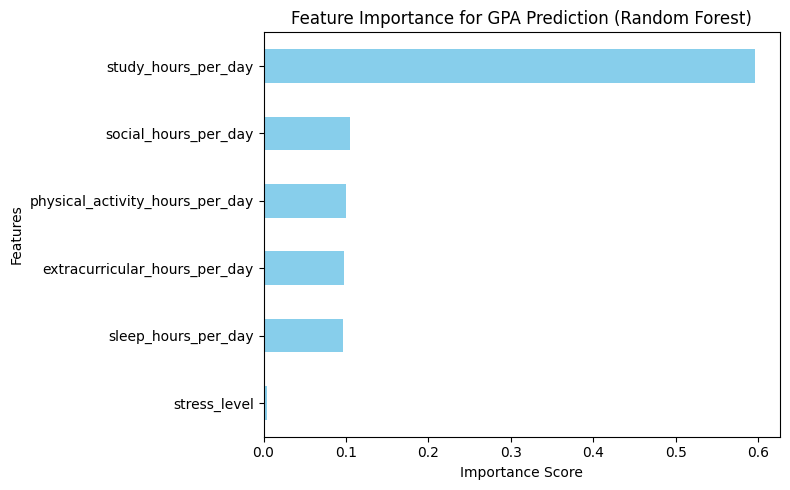

In [8]:
plt.figure(figsize=(8, 5))
importances.plot(kind="barh", color="skyblue")
plt.title("Feature Importance for GPA Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
# This bar chart shows the feature importance scores from the random forest model that I used 
# to predict GPA. The model looks at how much each lifestyle variable contributes to the prediction. 
# The chart makes it clear that study_hours_per_day is by far the strongest predictor of GPA, taking 
# up more than half of the total importance. The other variables such as social_hours_per_day, 
# physical_activity_hours_per_day, extracurricular_hours_per_day, and sleep_hours_per_day all have 
# similar but much smaller effects. Stress_level barely contributes to the prediction at all. 
# Overall, this graph supports the idea that academic performance in this dataset is mainly influenced 
# by how much students study, while other lifestyle habits play a much smaller role.